# Assignment 13


# Question 1


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 1 - Business Problem


___Prepare a model for glass classification using KNN___



# 2 - Data collection and description


In [2]:
df = pd.read_csv("glass.csv")


In [3]:
df1 = df.copy()


In [4]:
df1.loc[df['Type'] == 1, 'Type'] = 'building_windows_float_processed'
df1.loc[df['Type'] == 2, 'Type'] = 'building_windows_non_float_processed' 
df1.loc[df['Type'] == 3, 'Type'] = 'vehicle_windows_float_processed' 
df1.loc[df['Type'] == 4, 'Type'] = 'vehicle_windows_non_float_processed' 
df1.loc[df['Type'] == 5, 'Type'] = 'containers' 
df1.loc[df['Type'] == 6, 'Type'] = 'tableware' 
df1.loc[df['Type'] == 7, 'Type'] = 'headlamps' 

In [5]:
df1.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [6]:
df1.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


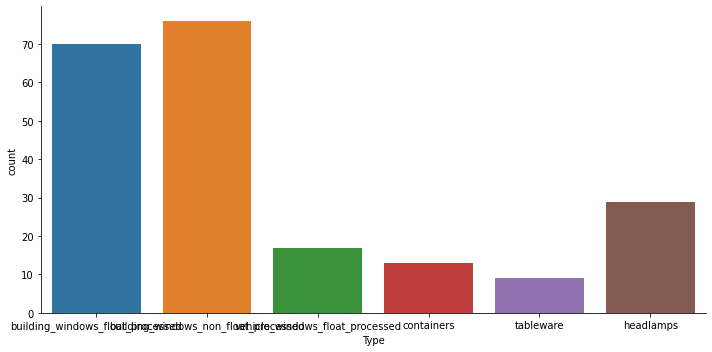

In [7]:
sns.factorplot('Type', data=df1, kind="count",size = 5,aspect = 2)


### As shown in the graphs above, majority of the glass types are building_windows_float_processed and building_windows_non_float_processed, followed by headlamps


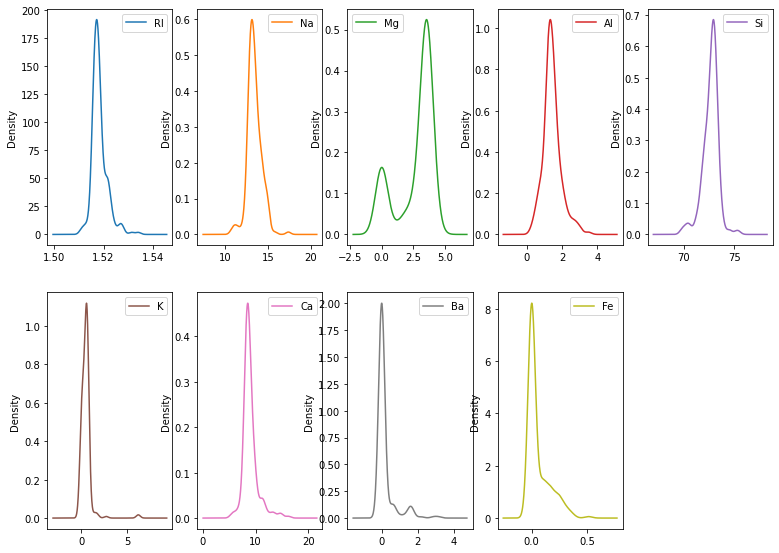

In [8]:
df1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

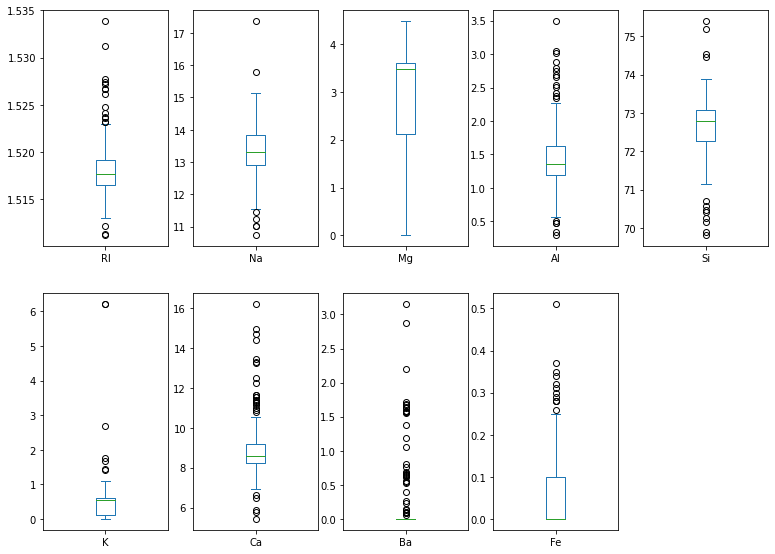

In [9]:
df1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

## 3 - Finding correlation between the variables in the data


In [10]:
cor = df1.corr(method='pearson')


In [11]:
cor.style.background_gradient(cmap='coolwarm')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables


## 4 - KNN


## 4.1 Finding optimal number of K


In [12]:
X = np.array(df1.iloc[:,3:5])
y = np.array(df1['Type'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [14]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [15]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

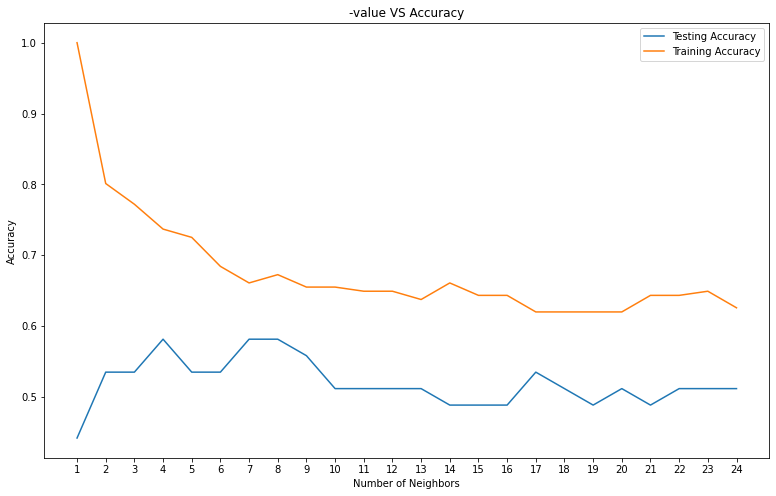

In [16]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

## we can see that k=4 produces the most accurate results


## 4.2 Applying the algorithm


In [17]:
knn = KNeighborsClassifier(n_neighbors=4)


In [18]:
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [19]:
scores = []
cv_scores = []

In [20]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [21]:
score_knn=cross_val_score(knn, X,y, cv=10)


In [22]:
score_knn.mean()


0.6127705627705629

In [23]:
score_knn.std()*2


0.23547117559816877

In [24]:
cv_score = score_knn.mean()


In [25]:
cv_scores.append(cv_score)


In [26]:
cv_scores


[0.6127705627705629]

# 5 - Conclusion


### Support Vector Machine Accuracy: 0.60 (+/- 0.21)
